In [1]:
def gaussj(a, b, n, m):
    
    
    indxc = []
    indxr = []
    ipiv = []
    
    for j in range(n):
        ipiv.append(0)
        
    for i in range(n):
        big = 0.0
        
        #szukanie elementu ,,obracająceg"
        for j in range(n):
            if ipiv[j] != 1:
                for k in range(n):
                    if ipiv[k] == 0:
                        if abs(a[j][k]) >= big:
                            big=abs(a[j][k])
                            irow=j
                            icol=k
                            
                            #print("big = ",big,"irow = ",irow,"icol = ",icol)
                            
        ipiv[icol]=ipiv[icol]+1
    
        #zamiana wierszy
        if (irow != icol):
            #print("zamiana")
            for l in range(n): a[irow][l],a[icol][l] = a[icol][l],a[irow][l]
            b[irow],b[icol] = b[icol],b[irow]
            
        indxr.append(irow);
        indxc.append(icol);
    
    
        #print("row = ",indxr,"col = ",indxc);
    
    
        #mnożenie przez element odwrotny
        
        if (a[icol][icol]) == 0.0: raise ValueError('Singular Matrix')
    
        pivinv=1.0/a[icol][icol]
        a[icol][icol]=1.0
    
    
        for l in range(n): a[icol][l] *= pivinv
        b[icol] *= pivinv
             
            
        
        for ll in range(n):
            if ll != icol:
                dum = a[ll][icol]
                a[ll][icol]=0.0
                
                for l in range(n): a[ll][l] -= a[icol][l]*dum
                b[ll] -= b[icol]*dum
    
    for l in reversed(range(n-1)):
        if (indxr[l] != indxc[l]):
            #print(l)
            #print(mat1)
            for k in range(n): a[k][indxr[l]],a[k][indxc[l]]=a[k][indxc[l]],a[k][indxr[l]]
            
    

In [2]:
mat1=[[9,9,6],[4,5,-6],[1,3,-5]]
mat2=[1,9,5]

#mat1=[[1,-3,2],[1,1,-2],[2,-1,1]]
#mat2 = [3,1,-1]

In [3]:
gaussj(mat1,mat2,3,1)

In [4]:
mat1

[[-0.0666666666666667, 0.6000000000000001, -0.8],
 [0.13333333333333336, -0.4857142857142859, 0.7428571428571429],
 [0.06666666666666668, -0.17142857142857143, 0.08571428571428573]]

In [5]:
mat2

[1.3333333333333337, -0.5238095238095242, -1.047619047619048]

In [6]:
import timeit
import time

dane = []
wyniki = []


import matplotlib.pyplot as plt


#setup = """
import random
import numpy as np
random.seed

for r in range(100):
    
    size = random.randrange(2, 100, 1)
    mat1 = np.random.rand(size,size)
    mat2= []
    for o in range(size):
        liczba = random.randrange(0, 9, 1)
        mat2.append(liczba)

#"""
    start = time.time()
    gaussj(mat1,mat2,size,1)
    czas = time.time() - start
    dane.append(size)
    wyniki.append(czas)
#print (min(timeit.Timer(gaussj(mat1,mat2,size,1), setup=setup).repeat(7, 1000)))

In [40]:
#print(mat1)

In [41]:
#print(mat2)

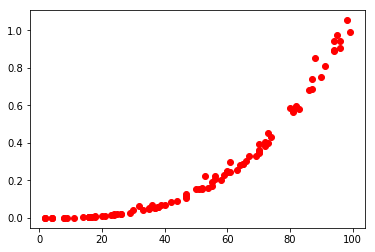

In [10]:
#data = [trace]
#print(size)
#print(czas)

line = plt.plot(dane, wyniki,'ro')
